# About the Dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px


In [14]:
df=pd.read_excel('PED_merged_imputed.xlsx') # Replace this with path to your file
df.head(5)

index            datetime  direct_radiation (W/m²)  PM25_PED  PM10_PED  \
0  25416 2020-11-25 01:00:00                        0       7.0      14.0   
1  25417 2020-11-25 02:00:00                        0       6.0      13.0   
2  25418 2020-11-25 03:00:00                        0       7.0      15.0   
3  25419 2020-11-25 04:00:00                        0       9.0      16.0   
4  25420 2020-11-25 05:00:00                        0      10.0      17.0   

   SO2_PED  O3_PED  NO2_PED  CO_PED  RH_PED  TMP_PED  WDR_PED  WSP_PED  \
0      2.0    24.0     12.0     0.2    47.0     13.6    228.0      1.8   
1      2.0    26.0      8.0     0.2    49.0     12.9    222.0      1.5   
2      2.0    14.0     20.0     0.4    54.0     12.1    238.0      1.7   
3      2.0    26.0      9.0     0.3    53.0     12.0    227.0      1.9   
4      2.0    28.0      7.0     0.2    52.0     11.9    228.0      2.0   

   is_festival  is_weekend  AirQualityIndex  
0            0           0                4  
1            0           0                4  
2            0           0                4  
3            0           0                4  
4            0           0                4

In [15]:
# We remove index column as we don't need it for the analysis
df = df.drop(columns=["index"])

**2. Analyze AQI (By Season, Temporal Patterns)**

*Overall Trends in AQI*

In [16]:
print(df.columns)

Index(['datetime', 'direct_radiation (W/m²)', 'PM25_PED', 'PM10_PED',
       'SO2_PED', 'O3_PED', 'NO2_PED', 'CO_PED', 'RH_PED', 'TMP_PED',
       'WDR_PED', 'WSP_PED', 'is_festival', 'is_weekend', 'AirQualityIndex'],
      dtype='object')


In [17]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year
df['hour'] = df['datetime'].dt.hour
print(df.columns)


Index(['datetime', 'direct_radiation (W/m²)', 'PM25_PED', 'PM10_PED',
       'SO2_PED', 'O3_PED', 'NO2_PED', 'CO_PED', 'RH_PED', 'TMP_PED',
       'WDR_PED', 'WSP_PED', 'is_festival', 'is_weekend', 'AirQualityIndex',
       'Month', 'Year', 'hour'],
      dtype='object')


In [6]:
df.reset_index(inplace=True)  # Ensure datetime is not already the index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Resample data for daily and monthly averages
daily_data = df.resample('D').mean()
monthly_data = df.resample('M').mean()
df


C:\Users\uSer\AppData\Local\Temp\ipykernel_15424\2948367234.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


index  direct_radiation (W/m²)  PM25_PED  PM10_PED  \
datetime                                                                  
2020-11-25 01:00:00      0                        0       7.0      14.0   
2020-11-25 02:00:00      1                        0       6.0      13.0   
2020-11-25 03:00:00      2                        0       7.0      15.0   
2020-11-25 04:00:00      3                        0       9.0      16.0   
2020-11-25 05:00:00      4                        0      10.0      17.0   
...                    ...                      ...       ...       ...   
2023-12-30 21:00:00  26783                      618      16.0      25.0   
2023-12-30 22:00:00  26784                      423      18.0      26.0   
2023-12-30 23:00:00  26785                      210      17.0      27.0   
2023-12-31 00:00:00  26786                       66      17.0      23.0   
2024-01-01 00:00:00  26787                        3      51.0      62.0   

                      SO2_PED  O3_PED  NO2_PED  CO_PED  RH_PED  TMP_PED  \
datetime                                                                  
2020-11-25 01:00:00  2.000000    24.0     12.0    0.20    47.0     13.6   
2020-11-25 02:00:00  2.000000    26.0      8.0    0.20    49.0     12.9   
2020-11-25 03:00:00  2.000000    14.0     20.0    0.40    54.0     12.1   
2020-11-25 04:00:00  2.000000    26.0      9.0    0.30    53.0     12.0   
2020-11-25 05:00:00  2.000000    28.0      7.0    0.20    52.0     11.9   
...                       ...     ...      ...     ...     ...      ...   
2023-12-30 21:00:00  0.833333    28.0     19.0    0.24    51.0     11.7   
2023-12-30 22:00:00  0.979167    19.0     24.0    0.38    55.0     10.6   
2023-12-30 23:00:00  0.958333    15.0     31.0    0.50    55.0     10.1   
2023-12-31 00:00:00  1.000000    27.0     17.0    0.19    56.0      9.5   
2024-01-01 00:00:00  1.458333    10.0     38.0    0.82    55.0     10.8   

                     WDR_PED  WSP_PED  is_festival  is_weekend  \
datetime                                                         
2020-11-25 01:00:00    228.0      1.8            0           0   
2020-11-25 02:00:00    222.0      1.5            0           0   
2020-11-25 03:00:00    238.0      1.7            0           0   
2020-11-25 04:00:00    227.0      1.9            0           0   
2020-11-25 05:00:00    228.0      2.0            0           0   
...                      ...      ...          ...         ...   
2023-12-30 21:00:00    211.0      1.0            0           1   
2023-12-30 22:00:00    235.0      0.8            0           1   
2023-12-30 23:00:00    217.0      2.2            0           1   
2023-12-31 00:00:00    225.0      2.2            0           1   
2024-01-01 00:00:00    234.0      1.7            1           0   

                     AirQualityIndex  Month  Year  hour  
datetime                                                 
2020-11-25 01:00:00                4     11  2020     1  
2020-11-25 02:00:00                4     11  2020     2  
2020-11-25 03:00:00                4     11  2020     3  
2020-11-25 04:00:00                4     11  2020     4  
2020-11-25 05:00:00                4     11  2020     5  
...                              ...    ...   ...   ...  
2023-12-30 21:00:00                5     12  2023    21  
2023-12-30 22:00:00                5     12  2023    22  
2023-12-30 23:00:00                5     12  2023    23  
2023-12-31 00:00:00                4     12  2023     0  
2024-01-01 00:00:00                5      1  2024     0  

[26788 rows x 18 columns]

In [7]:
df.columns

Index(['index', 'direct_radiation (W/m²)', 'PM25_PED', 'PM10_PED', 'SO2_PED',
       'O3_PED', 'NO2_PED', 'CO_PED', 'RH_PED', 'TMP_PED', 'WDR_PED',
       'WSP_PED', 'is_festival', 'is_weekend', 'AirQualityIndex', 'Month',
       'Year', 'hour'],
      dtype='object')

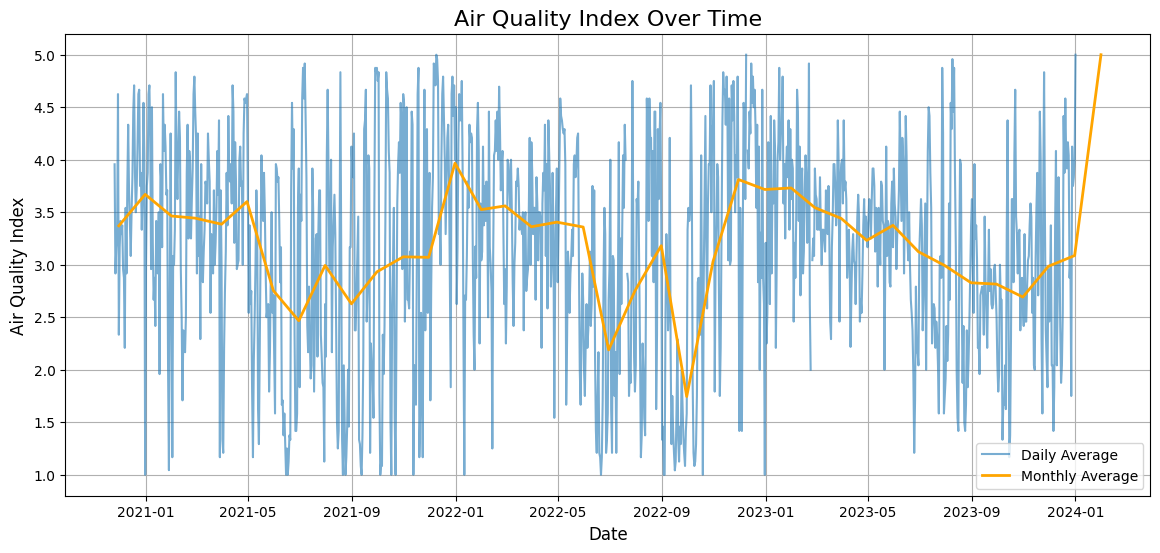

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(daily_data.index, daily_data['AirQualityIndex'], label='Daily Average', alpha=0.6)
plt.plot(monthly_data.index, monthly_data['AirQualityIndex'], label='Monthly Average', linewidth=2, color='orange')
plt.title('Air Quality Index Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Air Quality Index', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**Explanation**

This graph represents the AQI over time with **daily average values (blue)** and **monthly average values (orange)**.

- The **daily average AQI** **fluctuates significantly** and has **extreme spikes and dips**, showing high variability in air quality on a day-to-day basis which could be due to sudden environmental factors such as weather conditions, pollution events, etc.
- Whereas, **monthly average AQI** smooths out these fluctuations, showing the broader trend in air quality over time. 
- AQI initially **declines in mid-2021**, indicating possible improvement in air quality. However, it **rises again in early 2022**, followed by a **sharp drop in late 2022**.
- From **2023 onward**, the trend appears more **stable but still shows fluctuations**. And, a **sharp increase** in AQI is visible at the **beginning of 2024**, possibly indicating **worsening air pollution**.
- From the graph, it can be seen that during **winter months** the AQI tends to be **higher** as there are attributes such as **temperatures, calm winds, and high humidity** which traps pollutants near the ground, leading to poorer air quality. Additionally, **human activities like increased heating and traffic emissions** during colder months contribute to higher AQI levels.
- In contrast, during **summer and monsoon months**, the AQI **generally improves**. **Higher temperatures and stronger winds help disperse pollutants**, reducing their concentration at ground level. 

*Smoothed AQI with rolling average*

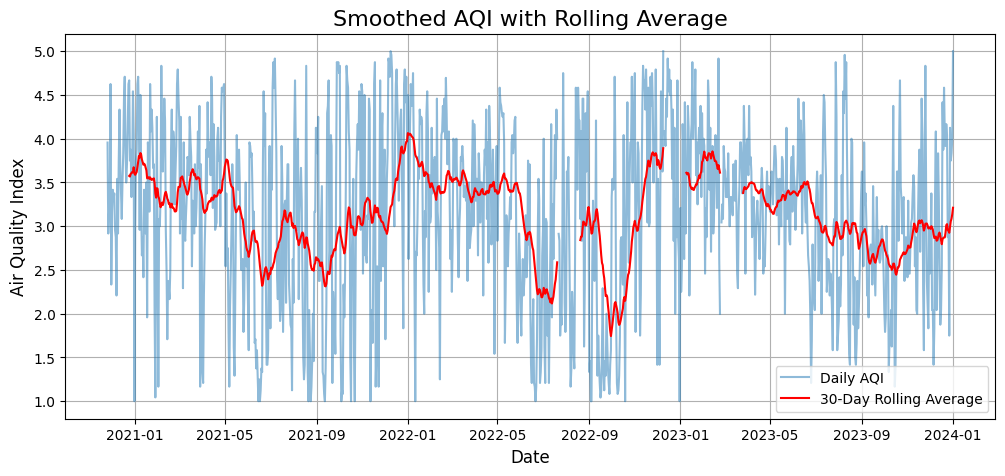

In [9]:
rolling_avg = daily_data['AirQualityIndex'].rolling(window=30).mean()

plt.figure(figsize=(12, 5))
plt.plot(daily_data.index, daily_data['AirQualityIndex'], label='Daily AQI', alpha=0.5)
plt.plot(daily_data.index, rolling_avg, label='30-Day Rolling Average', color='red')
plt.title('Smoothed AQI with Rolling Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Air Quality Index', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**Explanation**

This graph represents the AQI over time, with **daily AQI values (blue)** and a **30-day rolling average (red)** to smooth out short-term fluctuations.

- The **daily AQI values fluctuate heavily** which indicates day-to-day changes in air pollution due to **weather conditions, traffic, or industrial activities**. **Winter months likely have higher AQI** as cold air traps pollutants closer to the ground, while **summer/monsoon have lower AQI** because of **higher temperatures, wind, and rainfall that help disperse pollutants**.



*365 day rolling average of AQI*

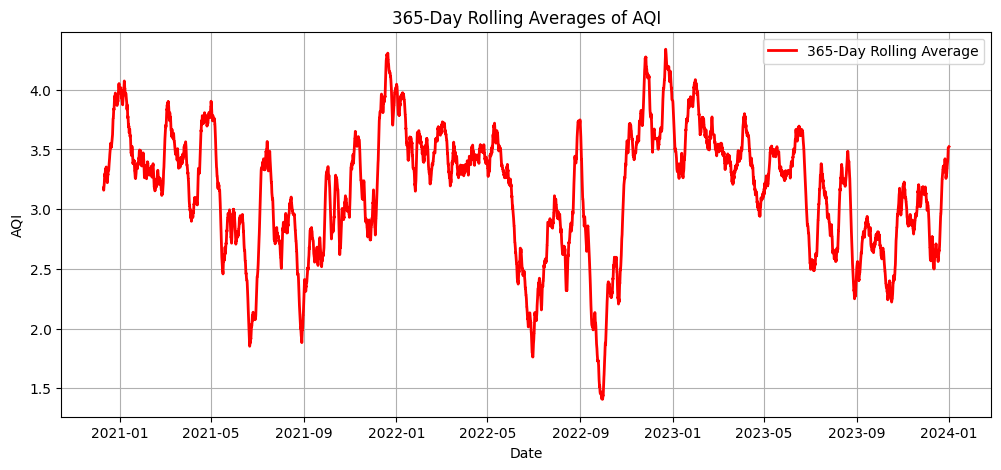

In [10]:
df['365_day_avg'] = df['AirQualityIndex'].rolling(window=365).mean()

# Plot the trends
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['365_day_avg'], label='365-Day Rolling Average', color='red', linewidth=2)
plt.title('365-Day Rolling Averages of AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

**Explanation**
A **rolling average (or moving average**) helps reduce short-term fluctuations and highlight underlying trends in time series data. It shows the **average AQI for the past 365 days** at each point, making it useful for analyzing yearly air quality trends.
- In the chart above, the AQI exhibits **multiple peaks and dips**, indicating periods of **worsening and improving air quality**. There are **peaks around early 2021, late 2022, and mid-2023**, suggesting increased pollution during these times. **Notable dips in AQI occur around mid-2021, mid-2022, and late 2023**, potentially due to **seasonal effects, policy changes, or reduced emissions**.

This analysis helps track air quality trends over time, making it useful for environmental planning and public health policies. 🌿💨

*Decompose Time Series plot*

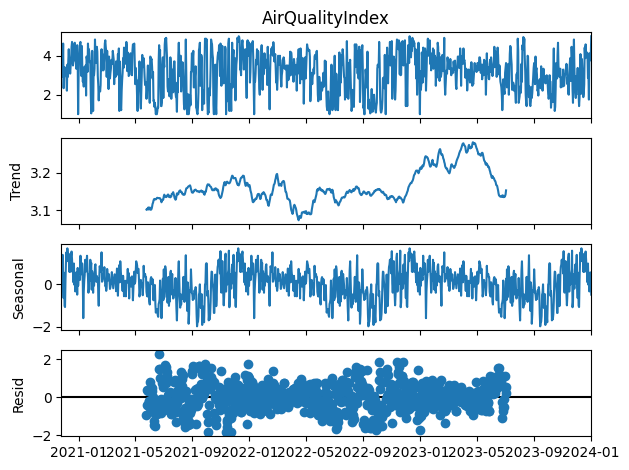

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residuals
decomposition = seasonal_decompose(daily_data['AirQualityIndex'].dropna(), model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()

**Explanation**

- The **first plot(AQI)** represents the **raw AQI values** over time shows **high fluctuations**, suggesting periodic variations and external influences on air quality.
- As seen in **second plot(trend)**, the AQI shows an increasing trend at certain periods,from **peaking in 2023**, and then **slightly declining**. The slight decline at the end could be due to seasonal variations or improved conditions.
- In the **third plot(seasonal)**, it's evident that the AQI has repeating **seasonal variations, likely influenced by weather conditions like temperature, humidity, and wind speed**.
- Lastly, for the **fourth residual plot**, as seen in the graph the residuals appear **randomly scattered**, suggesting that most variations are explained by the **trend and seasonality components**. However, some large deviations indicate **potential anomalies or unusual pollution events**.

This analysis helps understand how AQI changes over time by separating long-term trends, seasonal effects, and random noise. The increasing trend in AQI suggests worsening air quality over time, possibly due to growing pollution sources or worsening weather conditions. Seasonal variations indicate that certain times of the year consistently have worse air quality, understanding these patterns can help predict and manage air pollution effectively. 🚦🌍


*Effect of Weather on AQI*

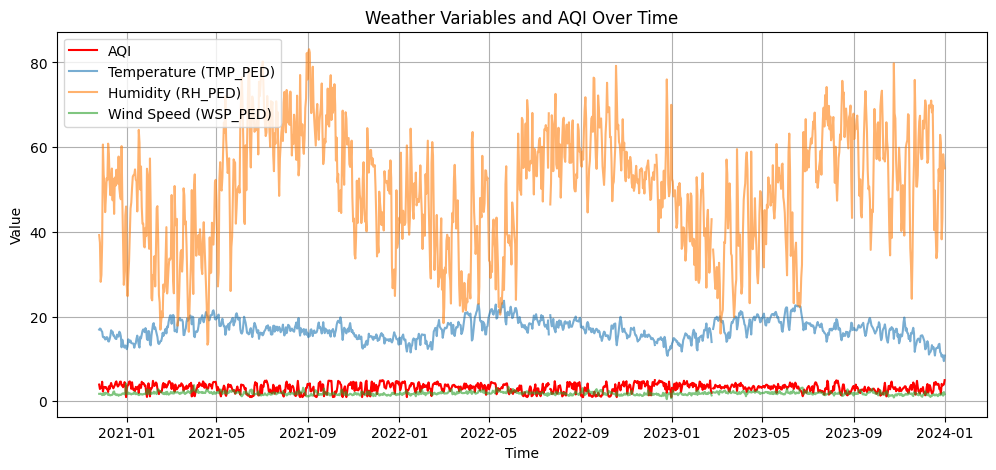

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(daily_data.index, daily_data['AirQualityIndex'], label='AQI', color='red')
plt.plot(daily_data.index, daily_data['TMP_PED'], label='Temperature (TMP_PED)', alpha=0.6)
plt.plot(daily_data.index, daily_data['RH_PED'], label='Humidity (RH_PED)', alpha=0.6)
plt.plot(daily_data.index, daily_data['WSP_PED'], label='Wind Speed (WSP_PED)', alpha=0.6)
plt.legend()
plt.title('Weather Variables and AQI Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


**Explanation**

**General Overview & Key Observations**

- **General Overview**
  - The graph tracks **Air Quality Index (AQI)** alongside key **weather variables** over time from 2021 to early 2024.
  - The variables include:
    - 🔴 AQI (Red line) – Indicates overall air pollution levels.
    - 🔵 Temperature (Blue line) – Fluctuates seasonally.
    - 🟠 Humidity (Orange line) – Shows significant variability over time.
    - 🟢 Wind Speed (Green line) – Remains relatively low throughout the period.

---

-  **Key Observations**

| **Observation** | **Details** |
|---------------|--------------------------------------------------------------|
| **📉 Seasonal Temperature Changes** | - Temperature follows a cyclical pattern, rising in summer and falling in winter each year. |
| **🌧️ High Variability in Humidity** | - Humidity shows frequent spikes and drops, indicating changing weather conditions, possibly due to rainy and dry seasons.|
| **🌬️ Low & Stable Wind Speed** | - Wind speed remains relatively low and does not show significant seasonal trends. Low wind speed can lead to stagnant air conditions, trapping pollutants. </br> - However, even small variations in wind speed can significantly affect pollution dispersion.|
| **🌫️ AQI Trends & Pollution Peaks** | - AQI remains relatively stable but with small fluctuations. </br> - Some peaks may align with low wind speed and high humidity, indicating potential pollution buildup. |
| **⛅ Relationship Between AQI & Weather** | - When wind speed is low and humidity is high, AQI tends to increase, suggesting poor air dispersion. </br> - Colder months may have slightly higher AQI due to temperature inversions trapping pollutants. |
---

- **Potential Interpretations**

| **Interpretation** | **Explanation** |
|------------------|------------------------------------------------------|
| **🚗 Stagnant Air Increases Pollution** | - Low wind speeds prevent pollutants from dispersing, leading to higher AQI. |
| **☀ Seasonal Effects on Pollution** | - In winter, temperature inversions might trap pollutants, leading to poor air quality. <br /> - Summer can have lower AQI due to stronger air mixing.|
| **💨 Humidity & AQI Relationship** | - High humidity can contribute to haze or smog, worsening air quality. But heavy rain can cleanse the air, lowering AQI. |
| **📉 Need for Wind to Improve Air Quality** | - Higher wind speeds would help disperse pollutants, reducing AQI. |

---

- **Conclusion**
This analysis suggests that weather conditions significantly impact air quality. Periods of low wind speed, high humidity, and cooler temperatures are associated with higher AQI, likely due to pollutants being trapped near the surface. Understanding these patterns can help predict and manage air pollution effectively. 🚦💨

C:\Users\uSer\AppData\Local\Temp\ipykernel_15424\1899740583.py:111: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




Summer (Rank 1):
- Average AQI: 2.80
- AQI Range: 1.00 - 5.00
- Primary Pollutants:
  * PM2.5: 13.77
  * PM10: 21.75
  * O3: 32.18
  * NO2: 15.88


Fall (Rank 2):
- Average AQI: 2.92
- AQI Range: 1.00 - 5.00
- Primary Pollutants:
  * PM2.5: 16.46
  * PM10: 26.31
  * O3: 28.75
  * NO2: 19.45


Spring (Rank 3):
- Average AQI: 3.32
- AQI Range: 1.00 - 5.00
- Primary Pollutants:
  * PM2.5: 21.55
  * PM10: 37.28
  * O3: 43.13
  * NO2: 17.55


Winter (Rank 4):
- Average AQI: 3.57
- AQI Range: 1.00 - 5.00
- Primary Pollutants:
  * PM2.5: 19.14
  * PM10: 34.02
  * O3: 29.86
  * NO2: 22.48



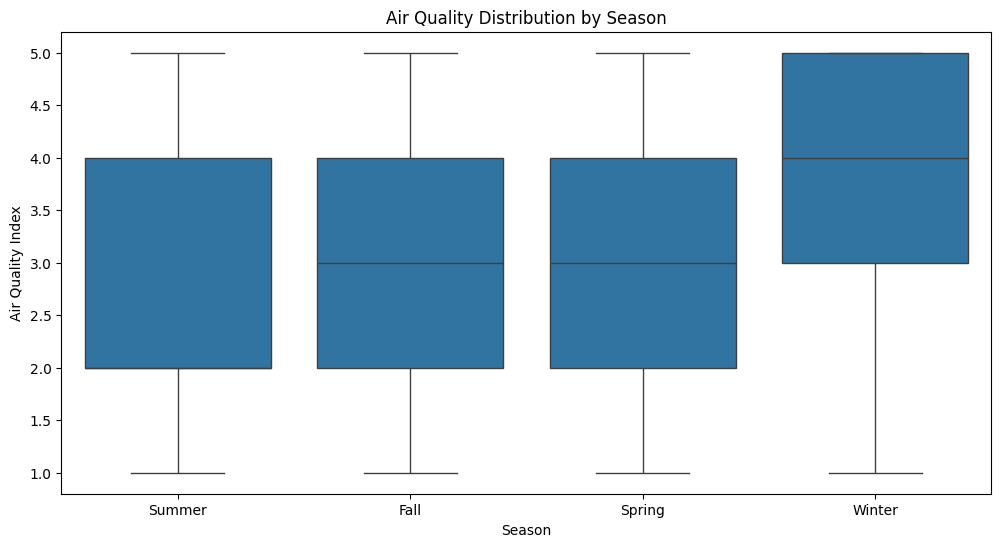

In [18]:
def analyze_seasonal_air_quality(df):
    """
    Analyze and rank air quality across seasons
    """
    # Create season mapping
    season_mapping = {12: 'Winter', 1: 'Winter', 2: 'Winter',
                     3: 'Spring', 4: 'Spring', 5: 'Spring',
                     6: 'Summer', 7: 'Summer', 8: 'Summer',
                     9: 'Fall', 10: 'Fall', 11: 'Fall'}

    # Add season column
    df['season'] = pd.to_datetime(df['datetime']).dt.month.map(season_mapping)

    # Calculate seasonal metrics
    seasonal_metrics = pd.DataFrame()

    # Calculate various air quality metrics by season
    seasonal_metrics = df.groupby('season').agg({
        'AirQualityIndex': ['mean', 'median', 'std', 'min', 'max'],
        'PM25_PED': 'mean',
        'PM10_PED': 'mean',
        'SO2_PED': 'mean',
        'O3_PED': 'mean',
        'NO2_PED': 'mean',
        'CO_PED': 'mean'
    }).round(2)

    # Flatten column names
    seasonal_metrics.columns = ['_'.join(col).strip() for col in seasonal_metrics.columns.values]

    # Calculate overall rank (based on mean AQI, lower is better)
    seasonal_metrics['overall_rank'] = seasonal_metrics['AirQualityIndex_mean'].rank()

    # Sort by mean AQI
    seasonal_metrics = seasonal_metrics.sort_values('AirQualityIndex_mean')

    return seasonal_metrics

def create_seasonal_visualizations(df, seasonal_metrics):
    """
    Create visualizations for seasonal air quality analysis
    """
    # 1. Season Ranking Box Plot
    fig1 = plt.figure(figsize=(12, 6))
    sns.boxplot(x='season', y='AirQualityIndex', data=df,
                order=seasonal_metrics.index)
    plt.title('Air Quality Distribution by Season')
    plt.xlabel('Season')
    plt.ylabel('Air Quality Index')

    # 2. Create detailed pollutant comparison
    fig2 = make_subplots(rows=2, cols=1,
                        subplot_titles=('Average AQI by Season',
                                      'Pollutant Levels by Season'))

    # Add AQI bar chart
    fig2.add_trace(
        go.Bar(x=seasonal_metrics.index,
               y=seasonal_metrics['AirQualityIndex_mean'],
               name='Average AQI',
               text=seasonal_metrics['overall_rank'].astype(int).astype(str),
               textposition='outside'),
        row=1, col=1
    )

    # Add pollutant lines
    pollutants = ['PM25_PED', 'PM10_PED', 'SO2_PED',
                  'O3_PED', 'NO2_PED', 'CO_PED']

    for pollutant in pollutants:
        fig2.add_trace(
            go.Scatter(x=seasonal_metrics.index,
                      y=seasonal_metrics[f'{pollutant}_mean'],
                      name=pollutant,
                      mode='lines+markers'),
            row=2, col=1
        )

    fig2.update_layout(height=800, width=1000,
                      title_text="Seasonal Air Quality Analysis",
                      showlegend=True)

    return fig1, fig2

def generate_seasonal_summary(seasonal_metrics):
    """
    Generate a detailed summary of seasonal air quality rankings
    """
    # Sort by AQI mean for ranking
    ranked_seasons = seasonal_metrics.sort_values('AirQualityIndex_mean')

    summary = []
    for season in ranked_seasons.index:
        metrics = ranked_seasons.loc[season]
        summary.append(f"""
{season} (Rank {int(metrics['overall_rank'])}):
- Average AQI: {metrics['AirQualityIndex_mean']:.2f}
- AQI Range: {metrics['AirQualityIndex_min']:.2f} - {metrics['AirQualityIndex_max']:.2f}
- Primary Pollutants:
  * PM2.5: {metrics['PM25_PED_mean']:.2f}
  * PM10: {metrics['PM10_PED_mean']:.2f}
  * O3: {metrics['O3_PED_mean']:.2f}
  * NO2: {metrics['NO2_PED_mean']:.2f}
""")

    return '\n'.join(summary)

seasonal_metrics = analyze_seasonal_air_quality(df)
fig1, fig2 = create_seasonal_visualizations(df, seasonal_metrics)
summary = generate_seasonal_summary(seasonal_metrics)
fig1.show()
fig2.show()
print(summary)

In [109]:
# Function to create temporal patterns plot
def create_temporal_patterns_plot(df):
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Hourly AQI Patterns',
                        'Monthly AQI Patterns',
                        'Weekend Effect',
                        'Festival Effect')
    )

    hourly_aqi = df.groupby('hour')['AirQualityIndex'].mean()
    fig.add_trace(
        go.Scatter(x=hourly_aqi.index,
                   y=hourly_aqi.values,
                   mode='lines+markers'),
        row=1, col=1
    )

    seasonal_aqi = df.groupby('Month')['AirQualityIndex'].mean()
    fig.add_trace(
        go.Bar(x=['Summer', 'Fall', 'Winter', 'Spring', ],
               y=seasonal_aqi.values),
        row=1, col=2
    )

    weekend_aqi = df.groupby('is_weekend')['AirQualityIndex'].mean()
    fig.add_trace(
        go.Bar(x=['Weekday', 'Weekend'],
               y=weekend_aqi.values),
        row=2, col=1
    )

    festival_aqi = df.groupby('is_festival')['AirQualityIndex'].mean()
    fig.add_trace(
        go.Bar(x=['Non-Festival', 'Festival'],
               y=festival_aqi.values),
        row=2, col=2
    )

    fig.update_layout(height=800,
                      width=1200,
                      showlegend=False,
                      title_text="Temporal Patterns in Air Quality")
    return fig

# Function to create pollutant relationships plot
def create_pollutant_relationships_plot(df):
    fig = px.scatter_matrix(
        df,
        dimensions=['PM25_PED', 'PM10_PED', 'SO2_PED',
                    'O3_PED', 'NO2_PED', 'CO_PED'],
        color='AirQualityIndex',
        title="Relationships Between Different Pollutants"
    )
    fig.update_layout(height=1000, width=1000)
    return fig

In [49]:
create_temporal_patterns_plot(df)

In [50]:
create_pollutant_relationships_plot(df)

**General Overview & Key Observations**

- **General Overview**
  - The plot showcases **pairwise relationships** between various air pollutants:
    - **PM2.5_PED**, **PM10_PED**, **SO2_PED**, **O3_PED**, **NO2_PED**, and **CO_PED**.
  - **Air Quality Index (AQI)** is represented as a **color gradient** in the scatterplots:
    - 🟡 **Yellow** → Higher AQI (**poorer air quality**).
    - 🟣 **Purple** → Lower AQI (**better air quality**).

---

-  **Key Observations**

| **Observation** | **Details** |
|---------------|--------------------------------------------------------------|
| **📈 Strong Positive Correlations Between Certain Pollutants** | - **PM2.5_PED** and **PM10_PED** show a strong linear correlation, suggesting they share similar sources, such as **vehicular emissions**, **industrial activities**, and **dust**. </br> -  **NO2_PED** and **PM2.5_PED** are linked, likely due to common sources like **traffic** and **combustion-related activities**. |
| **📉 Weak or Non-Linear Relationships** | - **CO_PED** and **O3_PED**, as well as **SO2_PED** and **CO_PED**, display **weak correlations**, implying different origins and atmospheric behaviors. </br> - **Ozone (O3_PED)** is a **secondary pollutant**, meaning it forms in the atmosphere rather than being directly emitted.|
| **🌫 Air Quality Index (Color Gradient)** | - High AQI (🟡 **yellow clusters**) are observed where **PM2.5_PED, PM10_PED, and NO2_PED** concentrations are high. <br> - Lower AQI values (🟣 **purple clusters**) appear where pollutant concentrations are minimal, reinforcing that **fine particulate matter and NO2** are primary contributors to poor air quality. |

---

- **Potential Interpretations**

| **Interpretation** | **Explanation** |
|------------------|------------------------------------------------------|
| **🚗 Pollutants from Common Sources** | - **PM2.5_PED, PM10_PED, and NO2_PED** likely come from: <br> ✅ Vehicular emissions <br> ✅ Industrial activities <br> ✅ Burning of fossil fuels |
| **☀ Ozone as a Secondary Pollutant** | - **O3_PED (ozone)** has weaker direct correlations with other pollutants because it is **formed from NOx and VOCs under sunlight**, rather than being emitted directly. |
| **📍 Localized vs. Regional Pollutants** | - **CO_PED (carbon monoxide)** is localized, often coming from **vehicles and incomplete combustion**. <br> - ***PM2.5_PED and PM10_PED** are regional pollutants, spreading over longer distances and showing broader correlations. |
| **📊 Impact on Air Quality Index (AQI)** | - **PM2.5_PED, PM10_PED, and NO2_PED** are the **primary contributors to poor air quality**. <br> - Targeting these pollutants through **regulations, emission controls, and urban planning** can significantly improve air quality.. |

---

- **Conclusion**
This analysis highlights how common pollutant sources, atmospheric transformations, and secondary formations influence air quality deterioration. Fine particulate matter (PM2.5, PM10) and NO2 are the major contributors to high AQI, making them key targets for pollution reduction policies.

**3. Pollutant Levels (Hourly, Monthly)**

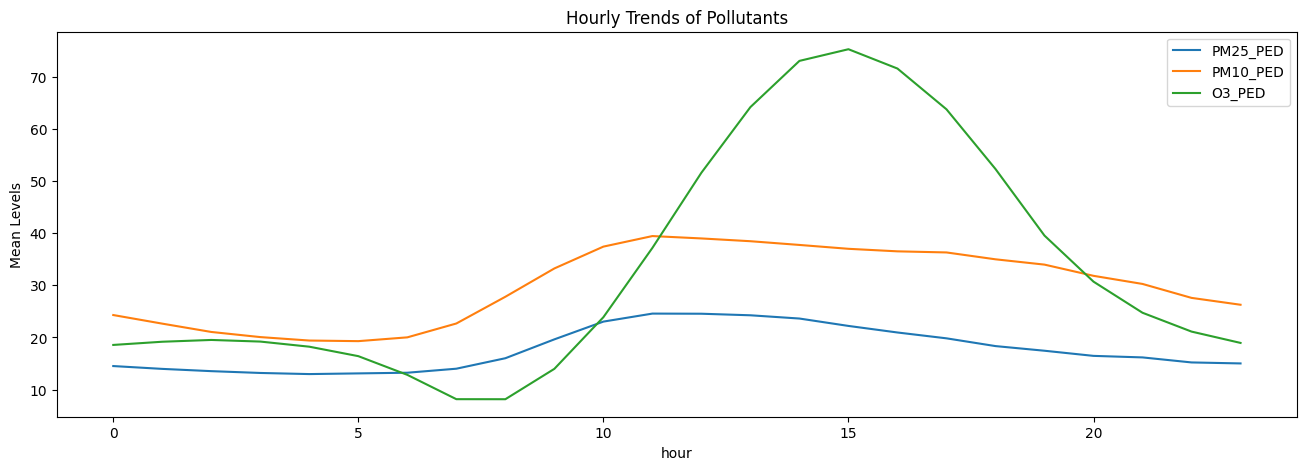

In [51]:
focused_columns = ['PM25_PED', 'PM10_PED', 'O3_PED']
df = df[focused_columns + ['hour', 'Month', 'is_weekend', 'is_festival']]

hourly_means = df.groupby('hour')[focused_columns].mean()
hourly_means.plot(kind='line', figsize=(16, 5))
plt.title('Hourly Trends of Pollutants')
plt.ylabel('Mean Levels')
plt.show()

**Observations & Insights on Air Pollutants Over Time**

- **Observations**

| **Pollutant** | **Key Trends** |
|--------------|----------------------------------------------------------|
| **🟠 PM10 (Orange Line)** | - **Dominant Contributor**: Maintains relatively high levels throughout the day. <br> - **Peak Hours**: Rises in the morning and peaks around **10:00 AM – 3:00 PM**. <br> - **Decline**: Slowly decreases after peak hours but remains at moderate levels in the evening. |
| **🔵 PM2.5 (Blue Line)** | - **Stable Trend**: Shows a **steady but gradual increase** starting from early morning. <br> - **Peak Around Midday**: Reaches its highest point slightly after 12:00 PM.  <br> - **Lower Concentration**: Follows a similar pattern to PM10 but at consistently lower levels. |
| **🟢 Ozone (O3) (Green Line)** | - **Distinct Peak**: Sharp increase starting around **9:00 AM**, reaching a peak between **12:00 – 3:00 PM**. <br> - **Rapid Decline**: Drops significantly in the evening and remains low at night. |

---

- **Insights**

| **Insight** | **Explanation** |
|------------|--------------------------------------------------------------|
| **⏳ Temporal Peaks** | - **PM10 & PM2.5** increase during the morning, likely due to **traffic and industrial emissions**. <br> - **Ozone (O3)** peaks around midday due to **photochemical reactions** driven by sunlight. |
| **🏭 Potential Sources** | - **PM10 & PM2.5**: Emissions from **vehicles, industries, and construction dust**. <br> - **Ozone (O3)**: Secondary pollutant formed by **NOx** and **VOCs** interacting with sunlight. |
| **🕰 Actionable Hours** | - **Lower pollution levels before 9:00 AM and after 6:00 PM.**. <br> - Outdoor activities are **safer** during these hours due to reduced pollutant exposure. |

---

- **Conclusion**

This analysis highlights **PM10 as the dominant pollutant**, with **Ozone following a strong** midday cycle influenced by sunlight. Understanding these trends can help in planning outdoor activities and reducing exposure to air pollution.  🚀


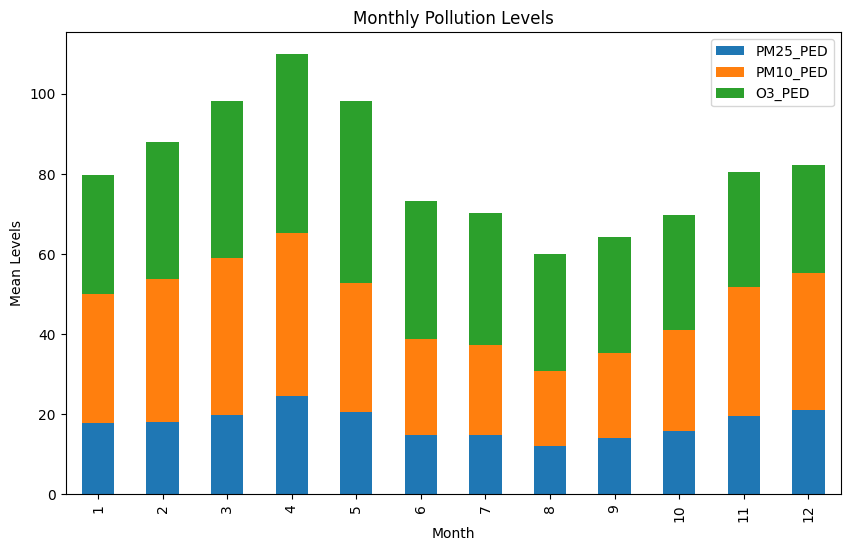

In [52]:
monthly_means = df.groupby('Month')[focused_columns].mean()
monthly_means.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Monthly Pollution Levels')
plt.ylabel('Mean Levels')
plt.xlabel('Month')
plt.show()

 **Monthly Pollution Levels for PM2.5, PM10, and Ozone (O3)**

- **Objective**

The stacked bar chart presents the **monthly mean pollution levels** of **PM2.5**, **PM10**, and **O3**, enabling a **comparative assessment** of **seasonal variations** and the contribution of each pollutant throughout the year.

---

- **Observations**

| **Observation** | **Key Details** |
|---------------|----------------------------------------------------------|
| **📈 Overall Trend** | - Pollution levels are higher from **January** to **May**, peaking in **April**. <br> - Lowest levels occur from **July** to **September**, followed by a gradual increase towards **December**. |
| **🟠 PM10 (Orange Bar)** | - A **significant contributor** to pollution, second only to **O3** in many months. <br> - Peaks between **March** and **May**, likely due to increased dust, dry weather, and human activities. |
| **🔵 PM2.5 (Blue Bar)** | - Shows **consistent levels** throughout the year, with **minor variations**. <br> - Higher values in **March**, **April**, and **December**, possibly due to temperature inversion and stagnant air conditions. |
| **🟢 Ozone (O3) (Green Bar)** | - **Highest contributor** to pollution levels, particularly from **March** to **June**. <br> - Likely influenced by **stronger sunlight and photochemical reactions** during warmer months. <br /> - Lowest levels in **July–September**, consistent with monsoon effects reducing ozone formation.|

---

- **Insights**

| **Insight** | **Explanation** |
|------------|------------------------------------------------------|
| **🌞 Seasonal Peaks** | - **April** shows the highest pollution levels, with all three pollutants reaching a peak. <br> - **December** also shows an increase, likely due to cold weather trapping pollutants closer to the surface. |
| **🏭 Dominant Pollutants** | - **Ozone (O3)** contributes significantly, **peaking in warm months** due to higher sunlight intensity. <br> - **PM10** levels are **highest in pre-monsoon months**, suggesting dust and industrial emissions as major sources. |
| **🌧️ Monsoon Effect**	 | - Pollution levels **drop significantly** in **July–September**, indicating that rain helps cleanse pollutants from the air. |


---

- **Conclusion**

The data highlights **seasonal pollution variations**, with **April** as the **worst month** for air quality. **Ozone** levels **peak in summer**, while **PM** pollution levels is **high in dry months**. This suggests the need for **targeted mitigation strategies**, such as **dust control in pre-monsoon months and reducing vehicular emissions during warmer months**. 🚀


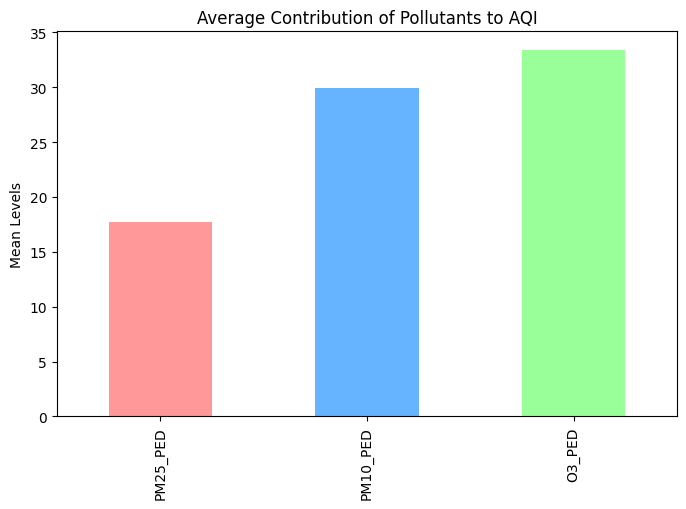

In [53]:
mean_contributions = df[focused_columns].mean()
mean_contributions.plot(kind='bar', figsize=(8, 5), color=['#FF9999', '#66B3FF', '#99FF99'])
plt.title('Average Contribution of Pollutants to AQI')
plt.ylabel('Mean Levels')
plt.show()

**Explanation**
- As per the graph, **Ozone (O3_PED)** has the **highest mean** level, slightly above 30. **PM10_PED** follows, with a mean level close to 30 which indicates that **O3 and PM10** are the **dominant contributors** to AQI in this dataset. **PM2.5_PED** has the **lowest contribution**, around 18.


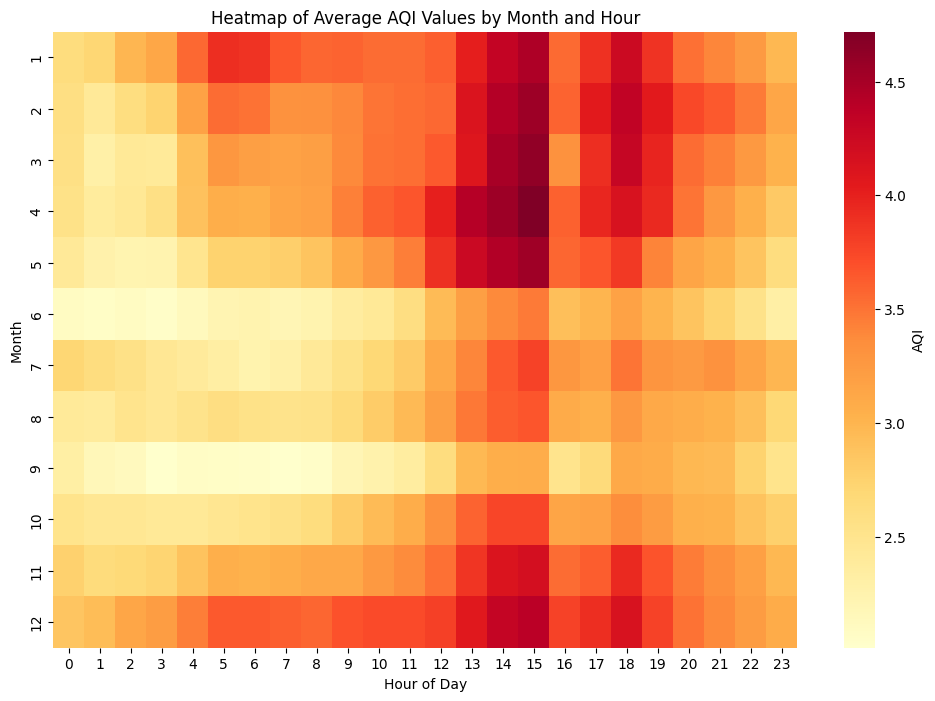

In [56]:
# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Set datetime as index
df.set_index('datetime', inplace=True)

df['month'] = df.index.month
df['hour'] = df.index.hour

monthly_hourly_aqi = df.groupby(['month', 'hour'])['AirQualityIndex'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_hourly_aqi, cmap='YlOrRd', cbar_kws={'label': 'AQI'})
plt.title('Heatmap of Average AQI Values by Month and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.show()

**Explanation**

From the heatmap, it can be seen that the highest AQI values occur in the early months of the year (January and February), likely due to increased heating activities, lower atmospheric mixing, and stagnant air conditions during winter. Another notable peak is seen in December, reinforcing the seasonal trend of higher pollution during colder months.

Regarding diurnal patterns, AQI levels tend to peak between late morning and early afternoon, particularly from 12 PM to 3 PM. This could likely be due to increased vehicular emissions, industrial activity, and photochemical reactions leading to the formation of ground-level pollutants. Additionally, a slight rise in AQI is visible in the evening, which may correspond to increased traffic congestion during evening commutes. 

Conversely, AQI values are lowest in the summer months (June, July, and August), likely due to better atmospheric dispersion and increased wind activity. Moreover, pollution levels tend to be lower during the early morning and late-night hours, possibly due to reduced human activity and lower emissions.

## Analysis Summary

#### **1. General Overview & Key Observations**
- **Dominant Pollutants:** **Ozone (O3_PED)** and **PM10_PED** are the **most significant contributors to AQI**, with mean levels around 30.
- **Strong Positive Correlations:** **PM2.5 and PM10** show a high correlation, indicating shared sources like the traffic, industrial emissions. **NO2 and PM2.5** also exhibit a strong link, suggesting common combustion-related origins.
- **Weak or Non-Linear Relationships:** **Ozone (O3)** shows weaker correlations with other pollutants since it is a secondary pollutant formed in the atmosphere. **CO and SO2** display weak correlations, suggesting different emission sources.
- **AQI Fluctuations:** **Daily AQI fluctuates significantly** due to **weather, traffic, and industrial activities**, while 365-day rolling averages highlight broader trends.
- **Major Pollution Peaks:** **Early 2021, late 2022, and mid-2023** show **notable pollution peaks** which **dips in mid-2021, mid-2022, and late 2023** may be due to seasonal effects or policy changes and then again a **sharp increase in early 2024** indicates potential **worsening of air quality**.


#### **2. Seasonal Trends & Variations**
- **Highest Pollution Periods:** AQI levels **peak in winter (January, February, December)** due to cold air trapping pollutants (temperature inversion), heating activities, and stagnant air. 
- **Lower Pollution Periods:** AQI is **lowest in summer (June–August)** likely due to improved atmospheric dispersion, higher wind activity, and rainfall.
- **Monsoon Effect (July–September):** Rainfall significantly reduces pollutant levels, especially for ozone.

#### **3. Diurnal Patterns of AQI**
- **Peak Pollution Hours:** AQI levels spike from **12 PM to 3 PM** likely due to **vehicular emissions, industrial activity, and photochemical reactions** forming ground-level pollutants. A **secondary peak in the evening** is probably due to increased traffic.

- **Lowest AQI Periods:** **Early morning and late-night hours** have **lower AQI due to reduced human activity and emissions**.

#### **4. Pollutant-Specific Trends Over Time**
- **PM10 and PM2.5** have **higher levels in the morning** due to traffic and industrial activities with peak at midday and **gradually decline in the evening**.
- **Sharp midday peak (12–3 PM)** due to sunlight-driven photochemical reactions which **declines in the evening** as sunlight decreases.

#### **5. Monthly Pollution Patterns**
- **Peak Pollution Months** are **January–May (highest in April)** because of dry weather increases dust & industrial emissions. Also, in **December as pollution rises** due to winter inversions trapping pollutants. And, **Ozone (O3) Peaks in Summer (March–June)** due to increased sunlight and photochemical activity.

